<a href="https://colab.research.google.com/github/KarenYu729/Pytorch-Note/blob/note/pytorch_learning_note1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Torch and Numpy

*reference*
</br>
(https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents-notebooks/201_torch_numpy.ipynb)

</br></br></br>
**numpy-dataframe-tensor**

</br>
convert numpy/dataframe to tensor or vise versa
</br>
**加粗文字**

In [ ]:
import torch
import numpy as np
# convert numpy to tensor or vise versa
np_data = np.arange(6).reshape((2, 3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()
print(
    '\nnumpy array:', np_data,          # [[0 1 2], [3 4 5]]
    '\ntorch tensor:', torch_data,      #  0  1  2 \n 3  4  5    [torch.LongTensor of size 2x3]
    '\ntensor to array:', tensor2array, # [[0 1 2], [3 4 5]]
)
# numpy array: [[0 1 2]
#  [3 4 5]] 
# torch tensor: tensor([[ 0,  1,  2],
#         [ 3,  4,  5]], dtype=torch.int32) 
# tensor to array: [[0 1 2]
#  [3 4 5]]

In [2]:
# create a dataframe
import pandas as pd
df = pd.DataFrame({
    'No.': [1,2,3,4,5],
    'name': ['A', 'B', 'C', 'D', 'E'],
    'hour': [5, 6, 6, 8, 7],
    'hourPay': [20, 25, 26, 35, 40]
})
df['salary'] = df['hour']*df['hourPay']
df

,No.,name,hour,hourPay,salary
0,1,A,5,20,100
1,2,B,6,25,150
2,3,C,6,26,156
3,4,D,8,35,280
4,5,E,7,40,280




---
dataframe to numpy


In [12]:
# dataframe to numpy
import numpy as np
df = df[['hour', 'hourPay', 'salary']]
npdf = np.array(df)
npdf
# pd.DataFrame({"A":[1, 2], "B":[3, 4]}).to_numpy()
# df

array([[  5,  20, 100],
       [  6,  25, 150],
       [  6,  26, 156],
       [  8,  35, 280],
       [  7,  40, 280]])



---
dataframe to tensor


In [13]:
# dataframe to tensor
import torch
train_data = torch.tensor(df.values)
train_data

tensor([[  5,  20, 100],
        [  6,  25, 150],
        [  6,  26, 156],
        [  8,  35, 280],
        [  7,  40, 280]])



---
numpy to tensor


In [15]:
# numpy to tensor
import torch
np_t = torch.from_numpy(npdf)
np_t

tensor([[  5,  20, 100],
        [  6,  25, 150],
        [  6,  26, 156],
        [  8,  35, 280],
        [  7,  40, 280]])



---
numpy to df


In [16]:
# numpy to df
import pandas as pd
new_df = pd.DataFrame(npdf)
new_df

,0,1,2
0,5,20,100
1,6,25,150
2,6,26,156
3,8,35,280
4,7,40,280




---
tensor to dataframe


In [17]:
# tensor to dataframe
import pandas as pd
newTdf = pd.DataFrame(train_data)
newTdf

,0,1,2
0,tensor(5),tensor(20),tensor(100)
1,tensor(6),tensor(25),tensor(150)
2,tensor(6),tensor(26),tensor(156)
3,tensor(8),tensor(35),tensor(280)
4,tensor(7),tensor(40),tensor(280)




---
tensor to numpy


In [18]:
# tensor to numpy
np_t = train_data.numpy()
np_t

array([[  5,  20, 100],
       [  6,  25, 150],
       [  6,  26, 156],
       [  8,  35, 280],
       [  7,  40, 280]])

</br></br></br>
**torch calculation**
</br>
一些关于tensor的计算

In [ ]:
#-----------------------------------------------------------------
# abs
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data)  # 32-bit floating point
print(
    '\nabs',
    '\nnumpy: ', np.abs(data),          # [1 2 1 2]
    '\ntorch: ', torch.abs(tensor)      # [1 2 1 2]
)
# abs 
# numpy:  [1 2 1 2] 
# torch:  tensor([ 1.,  2.,  1.,  2.])
tensor.abs()
# tensor([ 1.,  2.,  1.,  2.])
#-----------------------------------------------------------------
# sin
print(
    '\nsin',
    '\nnumpy: ', np.sin(data),      # [-0.84147098 -0.90929743  0.84147098  0.90929743]
    '\ntorch: ', torch.sin(tensor)  # [-0.8415 -0.9093  0.8415  0.9093]
)
# sin 
# numpy:  [-0.84147098 -0.90929743  0.84147098  0.90929743] 
# torch:  tensor([-0.8415, -0.9093,  0.8415,  0.9093])
#-----------------------------------------------------------------
tensor.sigmoid()
# tensor([ 0.2689,  0.1192,  0.7311,  0.8808])
#-----------------------------------------------------------------
tensor.exp()
# tensor([ 0.3679,  0.1353,  2.7183,  7.3891])
#-----------------------------------------------------------------
# mean
print(
    '\nmean',
    '\nnumpy: ', np.mean(data),         # 0.0
    '\ntorch: ', torch.mean(tensor)     # 0.0
)
# mean 
# numpy:  0.0 
# torch:  tensor(0.)
#-----------------------------------------------------------------
# matrix multiplication
data = [[1,2], [3,4]]
tensor = torch.FloatTensor(data)  # 32-bit floating point
# correct method
print(
    '\nmatrix multiplication (matmul)',
    '\nnumpy: ', np.matmul(data, data),     # [[7, 10], [15, 22]]
    '\ntorch: ', torch.mm(tensor, tensor)   # [[7, 10], [15, 22]]
)
# matrix multiplication (matmul) 
# numpy:  [[ 7 10]
#  [15 22]] 
# torch:  tensor([[ 7., 10.],
#         [15., 22.]])
#-----------------------------------------------------------------
# incorrect method
data = np.array(data)
tensor = torch.Tensor(data)
print(
    '\nmatrix multiplication (dot)',
    '\nnumpy: ', data.dot(data),        # [[7, 10], [15, 22]]
    '\ntorch: ', torch.dot(tensor.dot(tensor))     # NOT WORKING! Beware that torch.dot does not broadcast, only works for 1-dimensional tensor
)
# ---------------------------------------------------------------------------
# RuntimeError                              Traceback (most recent call last)
#  in ()
#       5     '\nmatrix multiplication (dot)',
#       6     '\nnumpy: ', data.dot(data),        # [[7, 10], [15, 22]]
# ----> 7     '\ntorch: ', torch.dot(tensor.dot(tensor))     # 30.0. Beware that torch.dot does not broadcast, only works for 1-dimensional tensor
#       8 )

# RuntimeError: dot: Expected 1-D argument self, but got 2-D
# Note that:

# torch.dot(tensor1, tensor2) → float

# Computes the dot product (inner product) of two tensors. Both tensors are treated as 1-D vectors.
#-----------------------------------------------------------------
tensor.mm(tensor)
# tensor([[  7.,  10.],
#         [ 15.,  22.]])
tensor * tensor
# tensor([[  1.,   4.],
#         [  9.,  16.]])
torch.dot(torch.Tensor([2, 3]), torch.Tensor([2, 1]))
# tensor(7.)


</br></br>
---
绝对值

abs


In [19]:
# abs
import torch
import numpy as np
data = np.array([2, 1, 0, -1, -2])
data = torch.from_numpy(data)
data.abs()

tensor([2, 1, 0, 1, 2])

In [21]:
from torch import FloatTensor
# also, it can be change to float

floatData = np.array([2, 1, 0, -1, -2])
Ftensor = torch.FloatTensor(floatData)
Ftensor.abs()

tensor([2., 1., 0., 1., 2.])


</br></br>
---


正弦

sin

In [26]:
# sin
data.sin()

tensor([ 0.9093,  0.8415,  0.0000, -0.8415, -0.9093])

In [27]:
Ftensor.sin()

tensor([ 0.9093,  0.8415,  0.0000, -0.8415, -0.9093])


</br></br>
---

sigmoid()


In [28]:
data.sigmoid()

tensor([0.8808, 0.7311, 0.5000, 0.2689, 0.1192])


</br></br>
---

exp()


In [29]:
data.exp()

tensor([7.3891, 2.7183, 1.0000, 0.3679, 0.1353])

</br></br>


---

mean()

In [35]:
torch.mean(Ftensor)
# 要注意一点，这里要求tensor中必须是float


tensor(0.)

In [36]:
# 所以理论上也可以
print(torch.mean(data.float()))
# 此时并不会改变data中的数据类型，只是在这里将data转化成float方便运算

tensor(0.)


In [37]:
# 如果此时tensor不是一维的
matrix = np.array([[2, 9, 4],[3, 5, 7],[6, 1, 8]])
tensor = torch.Tensor(matrix)
torch.mean(tensor)

tensor(5.)

</br></br>

---
矩阵乘法

matrix multiplication

In [38]:
torch.mm(tensor, tensor)

tensor([[ 55.,  67., 103.],
        [ 63.,  59., 103.],
        [ 63.,  67.,  95.]])

In [39]:
tensor.mm(tensor)

tensor([[ 55.,  67., 103.],
        [ 63.,  59., 103.],
        [ 63.,  67.,  95.]])

In [40]:
# 乘法，对应位置相乘
tensor * tensor

tensor([[ 4., 81., 16.],
        [ 9., 25., 49.],
        [36.,  1., 64.]])

In [42]:
torch.dot(torch.Tensor([2, 9, 4]), torch.Tensor([6, 1, 8]))

tensor(53.)

</br></br>
# Variable


*reference*


https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents-notebooks/202_variable.ipynb

In [66]:
import torch
from torch.autograd import Variable

tensor = torch.FloatTensor([[1,2],[3,4]])            # build a tensor
variable = Variable(tensor, requires_grad=True)      # build a variable, usually for compute gradients

print(tensor)       # [torch.FloatTensor of size 2x2]
print(variable)     # [torch.FloatTensor of size 2x2]

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)



</br></br>
---

</br>

### tensor 和 variable的区别

**pytorch两个基本对象：Tensor（张量）和Variable（变量）
其中，tensor不能反向传播，variable可以反向传播。**

### Variable

variable是一种可以不断变化的变量，符合反向传播，参数更新的属性。pytorch的variable是一个存放会变化值的地理位置，里面的值会不停变化，像装糖果（糖果就是数据，即tensor）的盒子，糖果的数量不断变化。pytorch都是由tensor计算的，而tensor里面的参数是variable形式。

In [67]:
t_out = torch.mean(tensor*tensor)       # x^2
v_out = torch.mean(variable*variable)   # x^2
print(t_out)
print(v_out)

tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward0>)


In [68]:
v_out.backward()    # backpropagation from v_out

In [69]:
print(variable.grad)

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


In [70]:
variable

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [71]:
variable.data # this is data in tensor format

tensor([[1., 2.],
        [3., 4.]])

In [72]:
variable.data.numpy() # numpy format

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [73]:
type(v_out)

torch.Tensor

In [74]:
type(v_out.data)

torch.Tensor

</br>

# Activation

## 激活函数

In [78]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

**Firstly generate some fake data**

In [76]:
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(200, 1)
print('original x:\n', x)
print(type(x))
x = Variable(x)
print('variable x:\n', x)
print(type(x))
x_np = x.data.numpy()   # numpy array for plotting
print(x_np)
print(type(x_np))

original x:
 tensor([-5.0000, -4.9497, -4.8995, -4.8492, -4.7990, -4.7487, -4.6985, -4.6482,
        -4.5980, -4.5477, -4.4975, -4.4472, -4.3970, -4.3467, -4.2965, -4.2462,
        -4.1960, -4.1457, -4.0955, -4.0452, -3.9950, -3.9447, -3.8945, -3.8442,
        -3.7940, -3.7437, -3.6935, -3.6432, -3.5930, -3.5427, -3.4925, -3.4422,
        -3.3920, -3.3417, -3.2915, -3.2412, -3.1910, -3.1407, -3.0905, -3.0402,
        -2.9899, -2.9397, -2.8894, -2.8392, -2.7889, -2.7387, -2.6884, -2.6382,
        -2.5879, -2.5377, -2.4874, -2.4372, -2.3869, -2.3367, -2.2864, -2.2362,
        -2.1859, -2.1357, -2.0854, -2.0352, -1.9849, -1.9347, -1.8844, -1.8342,
        -1.7839, -1.7337, -1.6834, -1.6332, -1.5829, -1.5327, -1.4824, -1.4322,
        -1.3819, -1.3317, -1.2814, -1.2312, -1.1809, -1.1307, -1.0804, -1.0302,
        -0.9799, -0.9296, -0.8794, -0.8291, -0.7789, -0.7286, -0.6784, -0.6281,
        -0.5779, -0.5276, -0.4774, -0.4271, -0.3769, -0.3266, -0.2764, -0.2261,
        -0.1759, -0.1256, -

**popular activation functions**

In [80]:
# tensor 带入函数，得到一个tensor之后，再转化会numpy
print(type(F.relu(x).data))
print(type(F.relu(x)))
y_relu = F.relu(x).data.numpy()
y_sigmoid = torch.sigmoid(x).data.numpy()
y_tanh = torch.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

<class 'torch.Tensor'>
<class 'torch.Tensor'>


**Plot to visualize these activation function**

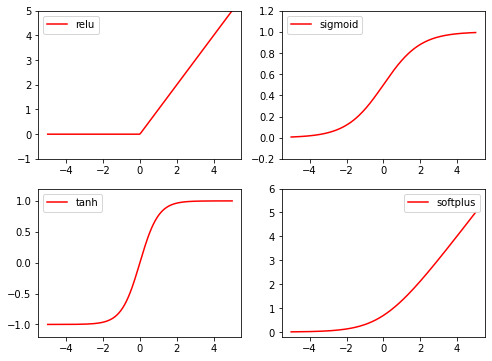

In [81]:
%matplotlib inline

plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()